In [1]:
!pip install --upgrade numpy
# Install RDKit
!pip install rdkit-pypi

# Install TensorFlow which includes Keras
!pip install tensorflow

# Optional: upgrade pip to avoid dependency issues
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 42.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling num

In [2]:
# Import libraries
from pathlib import Path
from warnings import filterwarnings

# Silence some expected warnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import os
import time
from rdkit import Chem
from rdkit.Chem import MACCSkeys, Draw, AllChem, rdMolDescriptors, rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.AtomPairs import Pairs, Torsions

# Try importing rdMolStandardize with fallback
try:
    from rdkit.Chem import rdMolStandardize
except ImportError:
    try:
        from rdkit.Chem.rdMolStandardize import *
    except ImportError:
        print("Warning: rdMolStandardize not available - using basic sanitization only")
        rdMolStandardize = None

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

# Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

%matplotlib inline

# Set random seeds for reproducibility
import random
import tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found

In [3]:
# Create output directory for models and visualizations
os.makedirs("fingerprint_comparison", exist_ok=True)

In [4]:
# Load data
print("Loading dataset...")
df = pd.read_csv("chembl_cdk5_ki.csv", index_col=0)
df = df.reset_index(drop=True)

Loading dataset...


Preparing dataset...
Dataset shape after preparation: (1038, 2)
pKi range: 4.10 to 9.50


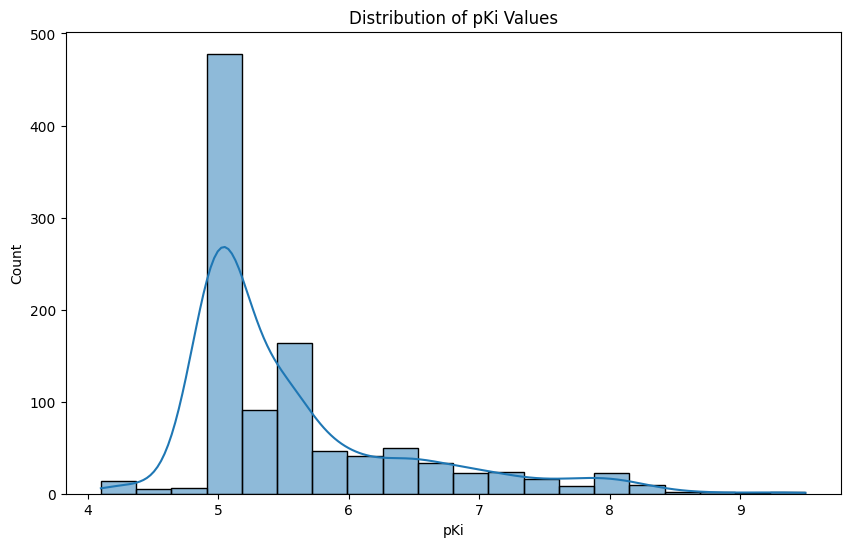

In [5]:

# Data cleaning and preparation
def clean_structure(smiles):
    """
    Clean chemical structures by:
    - Neutralizing charges
    - Removing salts
    - Taking largest fragment

    Parameters
    ----------
    smiles : str
        SMILES string representation of molecule

    Returns
    -------
    str or None
        Standardized SMILES string, or None if conversion fails
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None

        # Basic sanitization
        mol.UpdatePropertyCache(strict=False)
        Chem.SanitizeMol(mol)

        # Advanced standardization if available
        if rdMolStandardize is not None:
            try:
                # Standardizer
                normalizer = rdMolStandardize.Normalizer()
                mol = normalizer.normalize(mol)

                # Remove salts and fragments
                fragment_remover = rdMolStandardize.LargestFragmentChooser()
                mol = fragment_remover.choose(mol)

                # Charge neutralization
                uncharger = rdMolStandardize.Uncharger()
                mol = uncharger.uncharge(mol)
            except Exception as e:
                print(f"Standardization warning: {e}")

        return Chem.MolToSmiles(mol)
    except Exception as e:
        print(f"Error in structure cleaning: {e}")
        return None

# Clean and prepare the dataset
print("Preparing dataset...")
df["Standard Value"] = pd.to_numeric(df["Standard Value"], errors="coerce")
df = df.dropna(subset=["Standard Value", "Smiles"])

# Convert to pKi values (-log10 of Ki in M)
df["pKi"] = -np.log10(df["Standard Value"] * 1e-9)

# Clean structures
df["Cleaned_Smiles"] = df["Smiles"].apply(clean_structure)
df = df.dropna(subset=["Cleaned_Smiles"])
# Keep necessary columns
chembl_df = df[["Smiles", "pKi"]]

print(f"Dataset shape after preparation: {chembl_df.shape}")
print(f"pKi range: {chembl_df['pKi'].min():.2f} to {chembl_df['pKi'].max():.2f}")


# Display distribution of pKi values
plt.figure(figsize=(10, 6))
sns.histplot(data=chembl_df, x="pKi", bins=20, kde=True)
plt.title("Distribution of pKi Values")
plt.xlabel("pKi")
plt.ylabel("Count")
plt.savefig("fingerprint_comparison/pki_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


In [6]:
# Define a comprehensive fingerprint generation function
def generate_fingerprint(smiles, fp_type="maccs", radius=2, n_bits=2048):
    """
    Generate molecular fingerprints of different types.

    Parameters
    ----------
    smiles : str
        SMILES string of the molecule
    fp_type : str
        Type of fingerprint: 'maccs', 'morgan', or 'topological'
    radius : int
        Radius for Morgan fingerprints
    n_bits : int
        Number of bits for Morgan and topological fingerprints

    Returns
    -------
    numpy.ndarray
        Fingerprint as a numpy array
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(f"Warning: Could not convert SMILES to molecule: {smiles}")
            return np.zeros(n_bits if fp_type != "maccs" else 167)

        if fp_type == "maccs":
            return np.array(MACCSkeys.GenMACCSKeys(mol))
        elif fp_type == "morgan":
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=n_bits)
            return np.array(fp)
        elif fp_type == "topological":
            fp = Chem.RDKFingerprint(mol, fpSize=n_bits)
            return np.array(fp)
        else:
            print(f"Warning: Unknown fingerprint type '{fp_type}'. Using MACCS keys.")
            return np.array(MACCSkeys.GenMACCSKeys(mol))
    except Exception as e:
        print(f"Error generating fingerprint for {smiles}: {e}")
        return np.zeros(n_bits if fp_type != "maccs" else 167)


In [7]:
def build_cnn_model(input_dim, filters=64, kernel_size=5, dropout_rate=0.2, lr=0.001):
    """
    Build a 1D CNN model for regression.
    """
    model = Sequential([
        tf.keras.layers.Input(shape=(input_dim, 1)),
        tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='mean_squared_error',
        metrics=['mse', 'mae']
    )

    return model


In [8]:
# Function to train and evaluate a model with a specific fingerprint type
def train_evaluate_model(fp_type, radius=2, n_bits=2048, epochs=50, batch_size=32):
    """
    Train and evaluate a model using a specific fingerprint type.

    Parameters
    ----------
    fp_type : str
        Type of fingerprint: 'maccs', 'morgan', or 'topological'
    radius : int
        Radius for Morgan fingerprints
    n_bits : int
        Number of bits for Morgan and topological fingerprints
    epochs : int
        Number of training epochs
    batch_size : int
        Batch size for training

    Returns
    -------
    dict
        Dictionary containing model, history, and performance metrics
    """
    print(f"\n{'='*50}")
    print(f"Training model with {fp_type.upper()} fingerprints")
    if fp_type == 'morgan':
        print(f"Radius: {radius}, Bits: {n_bits}")
    print(f"{'='*50}")

    # Generate fingerprints
    start_time = time.time()
    if fp_type == 'maccs':
        chembl_df['fingerprints'] = chembl_df['Smiles'].apply(
            lambda x: generate_fingerprint(x, fp_type='maccs')
        )
    elif fp_type == 'morgan':
        chembl_df['fingerprints'] = chembl_df['Smiles'].apply(
            lambda x: generate_fingerprint(x, fp_type='morgan', radius=radius, n_bits=n_bits)
        )
    elif fp_type == 'topological':
        chembl_df['fingerprints'] = chembl_df['Smiles'].apply(
            lambda x: generate_fingerprint(x, fp_type='topological', n_bits=n_bits)
        )

    print(f"Time to generate fingerprints: {time.time() - start_time:.2f} seconds")
    # Split data
    X = np.array(list(chembl_df['fingerprints']))
    y = chembl_df['pKi'].values.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
    # Build model
    # CNN requires 3D input: (samples, time steps, channels)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    input_dim = X_train.shape[1]
    model = build_cnn_model(input_dim=input_dim)

    # Callbacks
    model_path = f"fingerprint_comparison/model_{fp_type}"
    if fp_type == 'morgan':
        model_path += f"_r{radius}"
    model_path += ".h5"

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=0)
    ]

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate on test set
    test_loss, test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest MSE: {test_mse:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate R² score
    r2 = metrics.r2_score(y_test, y_pred)
    print(f"R² Score: {r2:.4f}")

    # Plot learning curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Learning Curves - {fp_type.upper()}')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.5)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.title(f'Predicted vs Actual - {fp_type.upper()} (R²={r2:.4f})')
    plt.xlabel('Actual pKi')
    plt.ylabel('Predicted pKi')

    plt.tight_layout()
    plt.savefig(f"fingerprint_comparison/performance_{fp_type}{'' if fp_type != 'morgan' else f'_r{radius}'}.png",
                dpi=300, bbox_inches="tight")
    plt.show()

    return {
        'model': model,
        'history': history.history,
        'metrics': {
            'mse': test_mse,
            'mae': test_mae,
            'r2': r2
        },
        'fingerprint_type': fp_type,
        'predictions': y_pred,
        'actual': y_test
    }


In [9]:
# Train models with different fingerprint types
results = {}


Training model with MACCS fingerprints
Time to generate fingerprints: 5.44 seconds
Training set: (830, 167), Test set: (208, 167)
Epoch 1/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 26.7841 - mae: 5.0958 - mse: 26.7841

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 26.4456 - mae: 5.0617 - mse: 26.4456 - val_loss: 21.6540 - val_mae: 4.5706 - val_mse: 21.6540
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.9126 - mae: 3.9989 - mse: 16.9126

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 16.8092 - mae: 3.9849 - mse: 16.8092 - val_loss: 12.8098 - val_mae: 3.4704 - val_mse: 12.8098
Epoch 3/50
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.2888 - mae: 2.6362 - mse: 8.2888

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.8758 - mae: 2.5450 - mse: 7.8758 - val_loss: 4.5930 - val_mae: 1.9544 - val_mse: 4.5930
Epoch 4/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.4667 - mae: 1.1863 - mse: 2.4667

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 2.4275 - mae: 1.1803 - mse: 2.4275 - val_loss: 1.6566 - val_mae: 0.9507 - val_mse: 1.6566
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 2.0627 - mae: 1.1827 - mse: 2.0627 - val_loss: 2.2120 - val_mae: 1.2012 - val_mse: 2.2120
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.9774 - mae: 1.1271 - mse: 1.9774 - val_loss: 2.2899 - val_mae: 1.2327 - val_mse: 2.2899
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.7054 - mae: 1.0390 - mse: 1.7054 - val_loss: 2.1284 - val_mae: 1.1676 - val_mse: 2.1284
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.7869 - mae: 1.0797 - mse: 1.7869 - val_loss: 2.2407 - val_mae: 1.2136 - val_mse: 2.2407
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.6602 - mae: 0.9980 - mse: 1.6602 - val_loss: 2.1235 - val_mae: 1.1660 - val_mse: 2.1235
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1.6796 - mae: 1.0610 - mse: 1.6796 - val_loss: 2.1850 - v

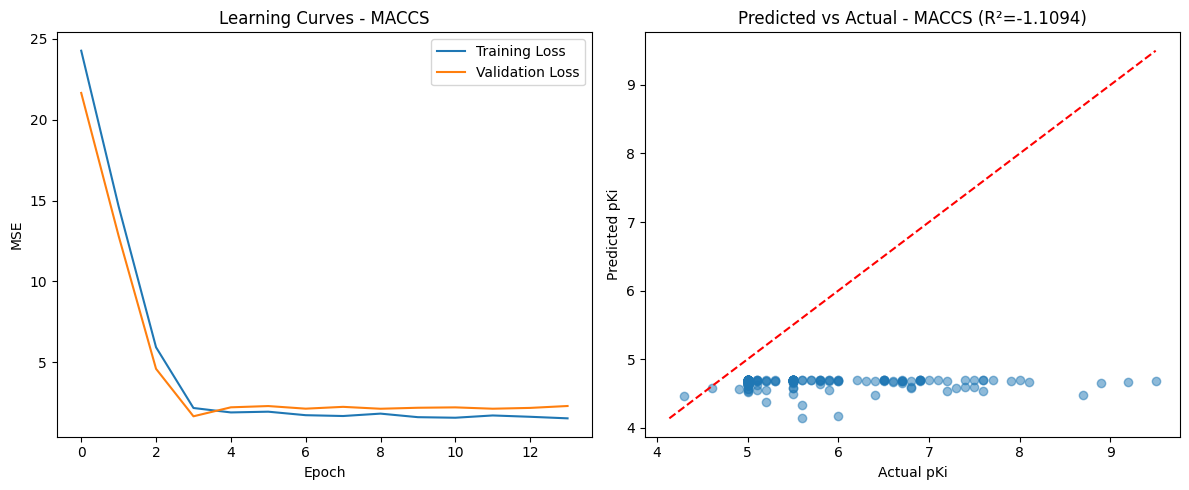


Training model with MORGAN fingerprints
Radius: 2, Bits: 2048
Time to generate fingerprints: 1.54 seconds
Training set: (830, 2048), Test set: (208, 2048)
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 28.6244 - mae: 5.2686 - mse: 28.6244

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 28.4823 - mae: 5.2547 - mse: 28.4823 - val_loss: 21.2466 - val_mae: 4.5256 - val_mse: 21.2466
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 16.0791 - mae: 3.8870 - mse: 16.0791

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 15.9526 - mae: 3.8691 - mse: 15.9526 - val_loss: 10.1667 - val_mae: 3.0639 - val_mse: 10.1667
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 5.1187 - mae: 1.9512 - mse: 5.1187

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 5.0540 - mae: 1.9340 - mse: 5.0540 - val_loss: 2.7906 - val_mae: 1.4003 - val_mse: 2.7906
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1.6592 - mae: 0.9953 - mse: 1.6592

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 1.6585 - mae: 0.9961 - mse: 1.6585 - val_loss: 1.7830 - val_mae: 0.9954 - val_mse: 1.7830
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 1.6150 - mae: 1.0213 - mse: 1.6150 - val_loss: 2.2398 - val_mae: 1.1959 - val_mse: 2.2398
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 1.5620 - mae: 0.9939 - mse: 1.5620 - val_loss: 2.2230 - val_mae: 1.1928 - val_mse: 2.2230
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 1.5422 - mae: 0.9664 - mse: 1.5422 - val_loss: 2.1652 - val_mae: 1.1716 - val_mse: 2.1652
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 1.4709 - mae: 0.9375 - mse: 1.4709 - val_loss: 2.1884 - val_mae: 1.1840 - val_mse: 2.1884
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 1.3791 - mae: 0.8928 - mse: 1.3791 - val_loss: 2.1774 - val_mae: 1.1820 - val_mse: 2.1774
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 1.4066 - mae: 0.9461 - mse: 1.4066 - val_loss: 2.0655 - 

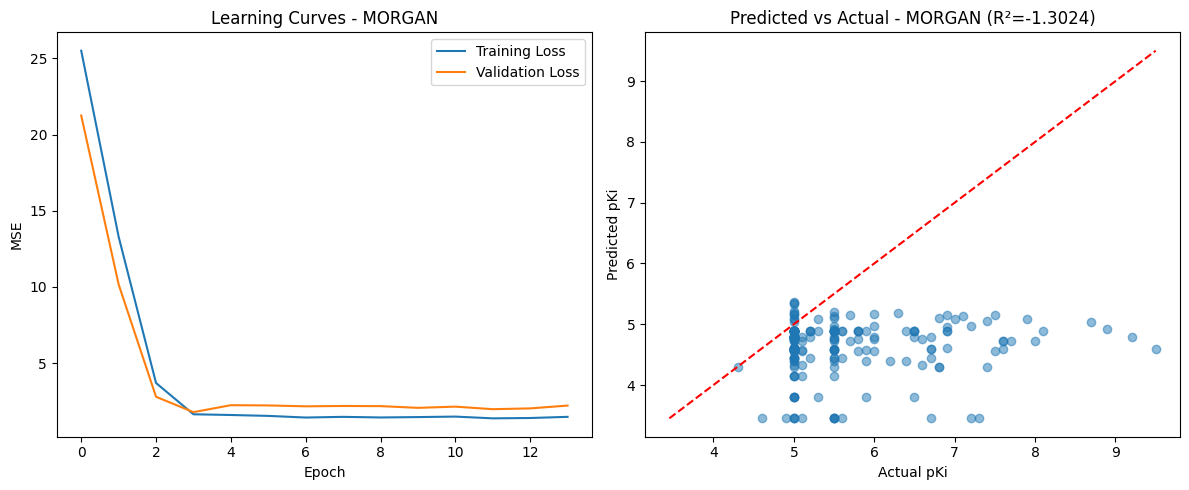


Training model with MORGAN fingerprints
Radius: 3, Bits: 2048
Time to generate fingerprints: 1.57 seconds
Training set: (830, 2048), Test set: (208, 2048)
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 32.8817 - mae: 5.6557 - mse: 32.8817

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 32.7282 - mae: 5.6419 - mse: 32.7282 - val_loss: 24.1470 - val_mae: 4.8358 - val_mse: 24.1470
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 19.4716 - mae: 4.3124 - mse: 19.4716

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 19.3538 - mae: 4.2979 - mse: 19.3538 - val_loss: 14.2626 - val_mae: 3.6742 - val_mse: 14.2626
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 8.8751 - mae: 2.7921 - mse: 8.8751

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 8.7987 - mae: 2.7761 - mse: 8.7987 - val_loss: 5.9022 - val_mae: 2.2625 - val_mse: 5.9022
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 2.6008 - mae: 1.2366 - mse: 2.6008

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 2.5809 - mae: 1.2318 - mse: 2.5809 - val_loss: 2.1896 - val_mae: 1.1763 - val_mse: 2.1896
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 1.6314 - mae: 1.0094 - mse: 1.6314

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 1.6289 - mae: 1.0087 - mse: 1.6289 - val_loss: 2.0273 - val_mae: 1.1081 - val_mse: 2.0273
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 2.0732 - mae: 1.1243 - mse: 2.0732 - val_loss: 2.4014 - val_mae: 1.2643 - val_mse: 2.4014
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 1.6393 - mae: 1.0061 - mse: 1.6393 - val_loss: 2.4616 - val_mae: 1.2886 - val_mse: 2.4616
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 1.4351 - mae: 0.9281 - mse: 1.4351 - val_loss: 2.2136 - val_mae: 1.1891 - val_mse: 2.2136
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 1.5139 - mae: 0.9772 - mse: 1.5139 - val_loss: 2.3055 - val_mae: 1.2278 - val_mse: 2.3055
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 1.6918 - mae: 1.0247 - mse: 1.6918 - val_loss: 2.2902 - val_mae: 1.2222 - val_mse: 2.2902
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 1.7200 - mae: 1.0082 - mse: 1.7200 - val_loss: 2.2278 -


Test MSE: 2.1309
Test MAE: 1.1085
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
R² Score: -1.5079


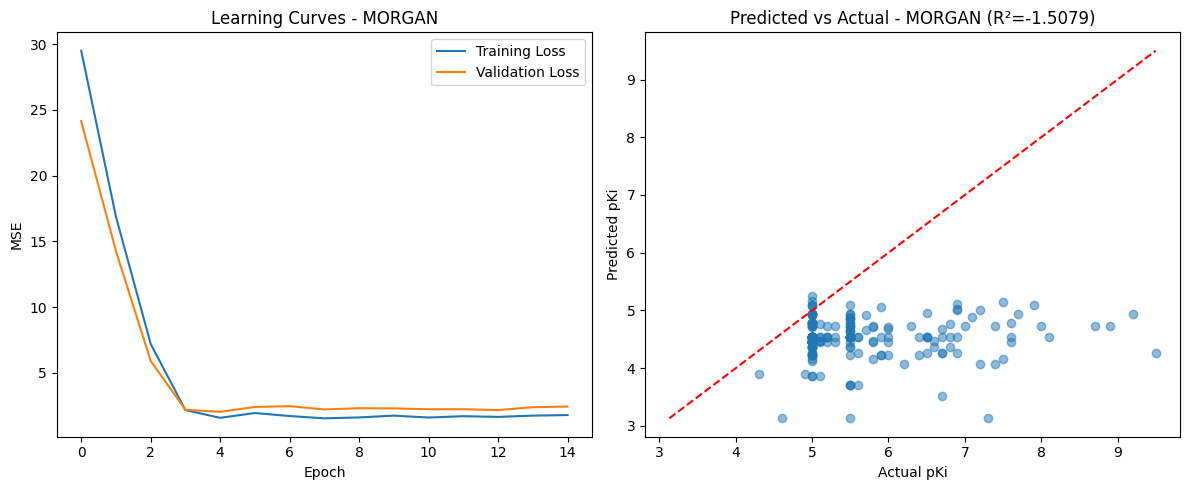


Training model with TOPOLOGICAL fingerprints
Time to generate fingerprints: 4.17 seconds
Training set: (830, 2048), Test set: (208, 2048)
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 33.9814 - mae: 5.7509 - mse: 33.9814

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 33.8069 - mae: 5.7353 - mse: 33.8069 - val_loss: 25.1711 - val_mae: 4.9404 - val_mse: 25.1711
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 21.2547 - mae: 4.5154 - mse: 21.2547

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 21.1591 - mae: 4.5044 - mse: 21.1591 - val_loss: 17.3251 - val_mae: 4.0696 - val_mse: 17.3251
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 12.4008 - mae: 3.3529 - mse: 12.4008

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 12.3113 - mae: 3.3384 - mse: 12.3113 - val_loss: 9.3295 - val_mae: 2.9267 - val_mse: 9.3295
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 4.9734 - mae: 1.8562 - mse: 4.9734

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 4.9318 - mae: 1.8449 - mse: 4.9318 - val_loss: 3.7369 - val_mae: 1.7243 - val_mse: 3.7369
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 2.2843 - mae: 1.1220 - mse: 2.2843

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 2.2765 - mae: 1.1221 - mse: 2.2765 - val_loss: 2.0810 - val_mae: 1.1550 - val_mse: 2.0810
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 2.0986 - mae: 1.1411 - mse: 2.0986 - val_loss: 2.3349 - val_mae: 1.2556 - val_mse: 2.3349
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 2.2312 - mae: 1.1479 - mse: 2.2312 - val_loss: 2.5601 - val_mae: 1.3404 - val_mse: 2.5601
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 1.8856 - mae: 1.0806 - mse: 1.8856 - val_loss: 2.3676 - val_mae: 1.2679 - val_mse: 2.3676
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 1.8066 - mae: 1.0597 - mse: 1.8066 - val_loss: 2.3245 - val_mae: 1.2517 - val_mse: 2.3245
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 2.0268 - mae: 1.1054 - mse: 2.0268 - val_loss: 2.5942 - val_mae: 1.3531 - val_mse: 2.5942
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 1.9294 - mae: 1.0944 - mse: 1.9294 - val_loss: 2.4715


Test MSE: 2.2351
Test MAE: 1.1789
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
R² Score: -1.6306


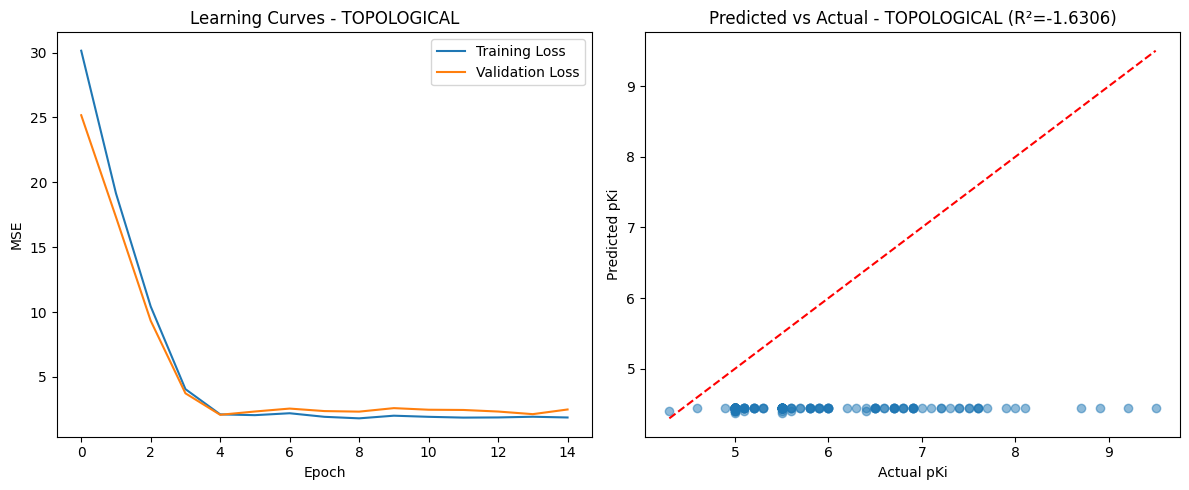

In [10]:
# 1. MACCS Keys (167 bits)
results['maccs'] = train_evaluate_model(fp_type='maccs')

# 2. Morgan Fingerprints (radius 2)
results['morgan_r2'] = train_evaluate_model(fp_type='morgan', radius=2)

# 3. Morgan Fingerprints (radius 3)
results['morgan_r3'] = train_evaluate_model(fp_type='morgan', radius=3)

# 4. Topological Fingerprints (optional)
results['topological'] = train_evaluate_model(fp_type='topological')


In [11]:
# Compare performance metrics
metrics_df = pd.DataFrame({
    'Fingerprint': [k for k in results.keys()],
    'MSE': [results[k]['metrics']['mse'] for k in results.keys()],
    'MAE': [results[k]['metrics']['mae'] for k in results.keys()],
    'R²': [results[k]['metrics']['r2'] for k in results.keys()]
})

print("\nPerformance Comparison:")
print(metrics_df)


Performance Comparison:
   Fingerprint       MSE       MAE        R²
0        maccs  1.792316  0.966102 -1.109447
1    morgan_r2  1.956232  1.008599 -1.302367
2    morgan_r3  2.130884  1.108480 -1.507922
3  topological  2.235116  1.178851 -1.630597


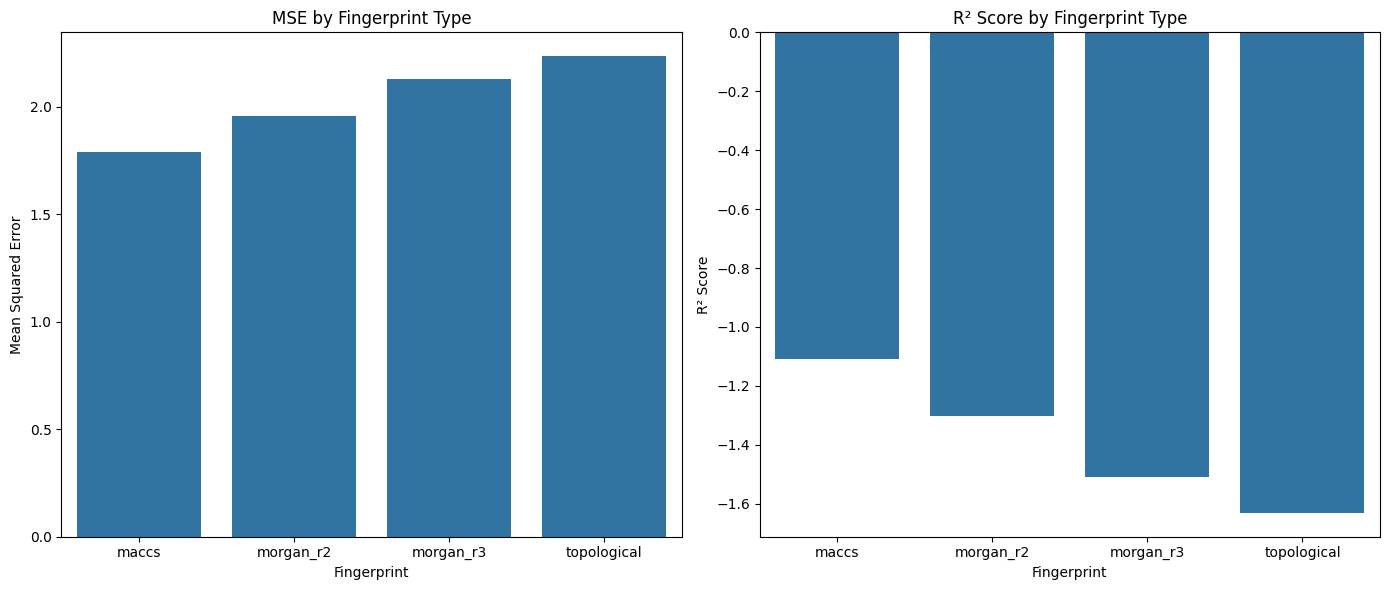

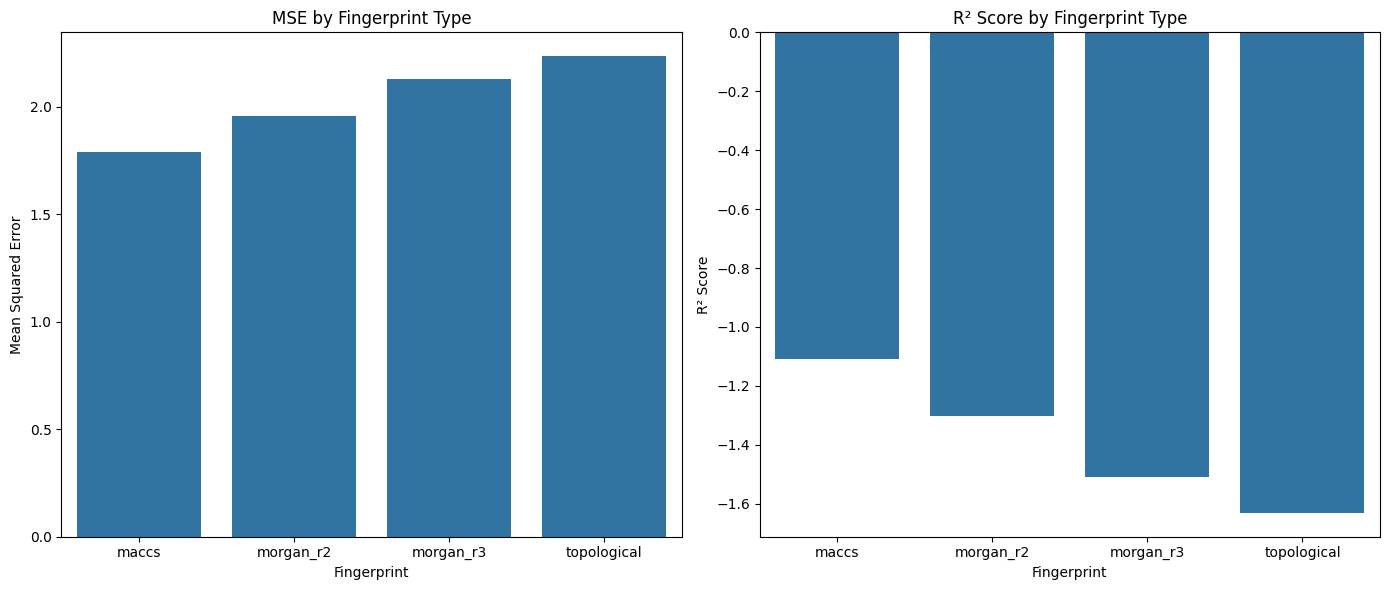

In [12]:
# Plot comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Fingerprint', y='MSE', data=metrics_df)
plt.title('MSE by Fingerprint Type')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
sns.barplot(x='Fingerprint', y='R²', data=metrics_df)
plt.title('R² Score by Fingerprint Type')
plt.ylabel('R² Score')

plt.tight_layout()
plt.savefig("fingerprint_comparison/metrics_comparison.png", dpi=300, bbox_inches="tight")
plt.show()# Plot comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Fingerprint', y='MSE', data=metrics_df)
plt.title('MSE by Fingerprint Type')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
sns.barplot(x='Fingerprint', y='R²', data=metrics_df)
plt.title('R² Score by Fingerprint Type')
plt.ylabel('R² Score')

plt.tight_layout()
plt.savefig("fingerprint_comparison/metrics_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

In [13]:
# Find the best performing fingerprint type
best_fp = metrics_df.loc[metrics_df['R²'].idxmax(), 'Fingerprint']
print(f"\nBest performing fingerprint: {best_fp} (R²={metrics_df['R²'].max():.4f})")

# Optional: External prediction


Best performing fingerprint: maccs (R²=-1.1094)


In [19]:
# Optional: External prediction
try:
    print("\nLoading external dataset for predictions...")
    external_data = pd.read_csv("enamine.csv")

    # Use the best fingerprint type for prediction
    best_fp_type = best_fp.split('_')[0] if '_' in best_fp else best_fp
    best_radius = int(best_fp.split('_r')[1]) if '_r' in best_fp else 2

    print(f"Generating {best_fp_type} fingerprints for external dataset...")
    external_data['fingerprints'] = external_data['SMILES'].apply(
        lambda x: generate_fingerprint(
            x,
            fp_type=best_fp_type,
            radius=best_radius if best_fp_type == 'morgan' else 2
        )
    )

    # Get the best model
    best_model = results[best_fp]['model']

    # Make predictions
    print("Making predictions on external dataset...")
    X_external = np.array(list(external_data['fingerprints'])).astype(np.float32)

    # If model is CNN, reshape for Conv1D input: (samples, features, channels)
    X_external = X_external.reshape((X_external.shape[0], X_external.shape[1], 1))

    predictions = best_model.predict(X_external)

    # Add predictions to dataframe
    external_data['predicted_pKi'] = predictions

    print(f"Top 5 predicted compounds:")
    top_compounds = external_data.nlargest(5, 'predicted_pKi')
    print(top_compounds[['SMILES', 'predicted_pKi']])

    # Save predictions
    external_data.to_csv("fingerprint_comparison/external_predictions.csv", index=False)

except Exception as e:
    print(f"An error occurred during external prediction: {e}")


Loading external dataset for predictions...
Generating maccs fingerprints for external dataset...
Making predictions on external dataset...
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step
Top 5 predicted compounds:
                                SMILES  predicted_pKi
4   NC(=O)c1cc(CCO)c(C(F)(F)F)[nH]c1=O       4.696156
14          c1ccc2oc(NCCCn3cccn3)nc2c1       4.696156
20       Cc1nc2ccccc2nc1NCCNS(C)(=O)=O       4.696156
25  O=c1[nH]c(CN2CCOCC2)nc2cc(Cl)ccc12       4.696156
26    Nc1nc2cc(C(F)(F)F)ccc2n1Cc1ccco1       4.696156


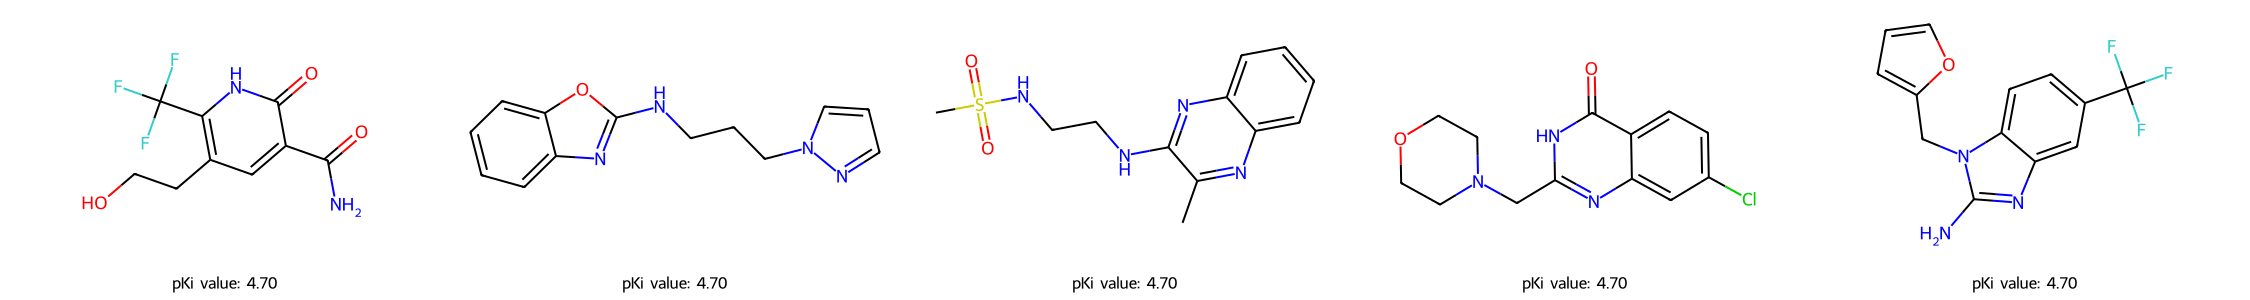

In [20]:
# Draw the drug molecules
# Get predicted pKi values from external_data DataFrame
predicted_pKi_df = external_data.copy()  # Assuming external_data is from the previous cell

# Select the top 5 compounds based on predicted_pKi
top5_drug = predicted_pKi_df.nlargest(5, 'predicted_pKi')

# Get SMILES strings for the top 5 compounds
highest_pKi = predicted_pKi_df["SMILES"][top5_drug.index]

mols_CDK5 = [Chem.MolFromSmiles(smile) for smile in highest_pKi]
pKi_CDK5 = top5_drug["predicted_pKi"].tolist()
# Assuming 'pKi_CDK5' contains the predicted pKi values, and you want to display them as is
pKi_values = [(f"pKi value: {value:.2f}") for value in pKi_CDK5]
# Changed 'pKi-CDK5' to 'pKi_CDK5'

Draw.MolsToGridImage(mols_CDK5, molsPerRow=5, subImgSize=(450, 300), legends=pKi_values)